IMPORTING LIBRARIES

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [44]:
def zs_normalization(x):
    mean = np.mean(x, axis = 0)
    std_dev = np.std(x, axis = 0)
    normalized_x = (x - mean)/std_dev
    return normalized_x

In [45]:
x_train = train_data.iloc[:,:-1].values
x_train = zs_normalization(x_train)

x_test = test_data.iloc[:,:-1].values
x_test = zs_normalization(x_test)

y_train = train_data.iloc[:,-1].values
y_test = test_data.iloc[:,-1].values

w = np.zeros(x_train.shape[1])
b = 0

In [46]:
def f(x, w, b):
    return np.dot(x, w) + b

In [47]:
def j(x, y, w, b):
    m = len(y)
    y_cap = f(x, w, b)
    sq_error = (y_cap - y)**2
    cost = 1/(m) * np.sum(sq_error)
    return cost

In [48]:
def gradient_descent(x, y, w, b, alpha, itr):
    m = len(y)
    costs = []
    for i in range (itr+1):
        y_cap = f(x, w, b)
        error = (y_cap - y)

        temp_w = w - (2*alpha/m)*np.dot(error, x)
        temp_b = b - (2*alpha/m)*np.sum(error)

        w = temp_w
        b = temp_b

        cost = j(x, y, w, b)
        costs.append(cost)

        if (i%50 == 0):
            print('itr:',i,' ',costs[i])

        

    plt.plot(range(1,itr+2), costs, marker = 'o', linestyle = '-')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Learning Curve')

    return w, b

In [49]:
def r2_score(y_true, y_predict):
    y_true_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_true_mean)**2)
    ss_residual = np.sum((y_true - y_predict)**2)
    r2 = 1 - (ss_residual/ss_total)
    return r2

itr: 0   36998085621.292915
itr: 50   5821865145.878176
itr: 100   2134579244.418401
itr: 150   1625495392.717931
itr: 200   1547676702.0479212
itr: 250   1531774136.9995685
itr: 300   1526452486.00192
itr: 350   1523781161.502712
itr: 400   1522154629.1920033
itr: 450   1521075456.9853806
itr: 500   1520324251.22092
itr: 550   1519784523.5400686
itr: 600   1519388125.168548
itr: 650   1519092470.826902
itr: 700   1518869530.0642238
itr: 750   1518700076.9085062
itr: 800   1518570503.9140997
itr: 850   1518470955.6872323
itr: 900   1518394175.0556006
itr: 950   1518334754.2387416
itr: 1000   1518288628.600557
Training Accuracy: 0.7618704627782282


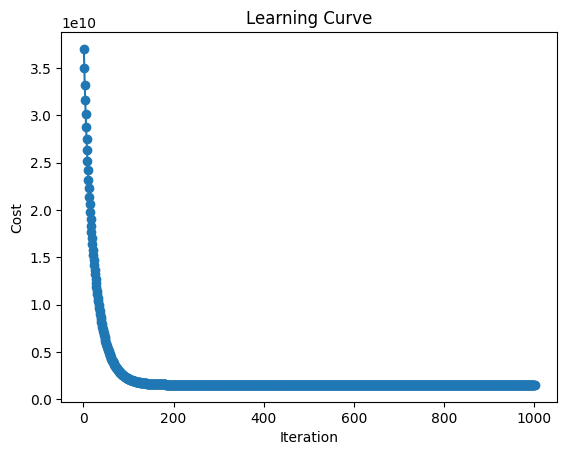

In [50]:
alpha = 0.01
itr = 1000

w, b = gradient_descent(x_train, y_train, w, b, alpha, itr)
y_cap_train = f(x_train, w, b)
r2_train = r2_score(y_train, y_cap_train)
print ('Training Accuracy:',r2_train)

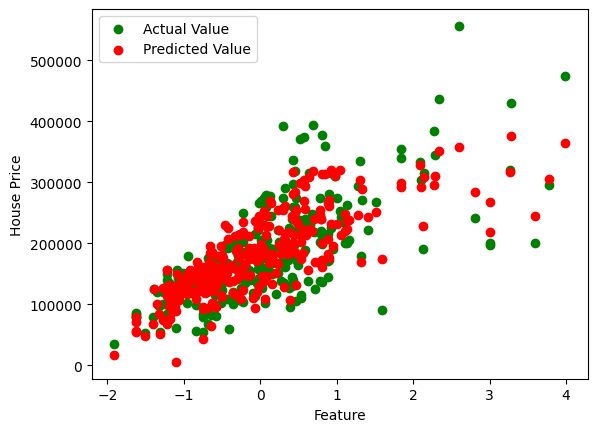

Testing Accuracy: 0.8213509346910611


In [51]:
y_cap_test = f(x_test, w, b)
plt.scatter(x_test[:,1], y_test, label = 'Actual Value', color = 'green')
plt.scatter(x_test[:,1], y_cap_test, label = 'Predicted Value', color = 'red')
plt.xlabel('Feature')
plt.ylabel('House Price')
plt.legend()
plt.show()
r2_test = r2_score(y_test, y_cap_test)
print ('Testing Accuracy:',r2_test)
